<a href="https://colab.research.google.com/github/OrestisGeo/MSc_MachineLearning/blob/Excercise_2/ML_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Exercise 2**

Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import files

**Question 1:**

In [19]:
data = files.upload()

Saving water_potability.csv to water_potability (2).csv


In [20]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [21]:
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

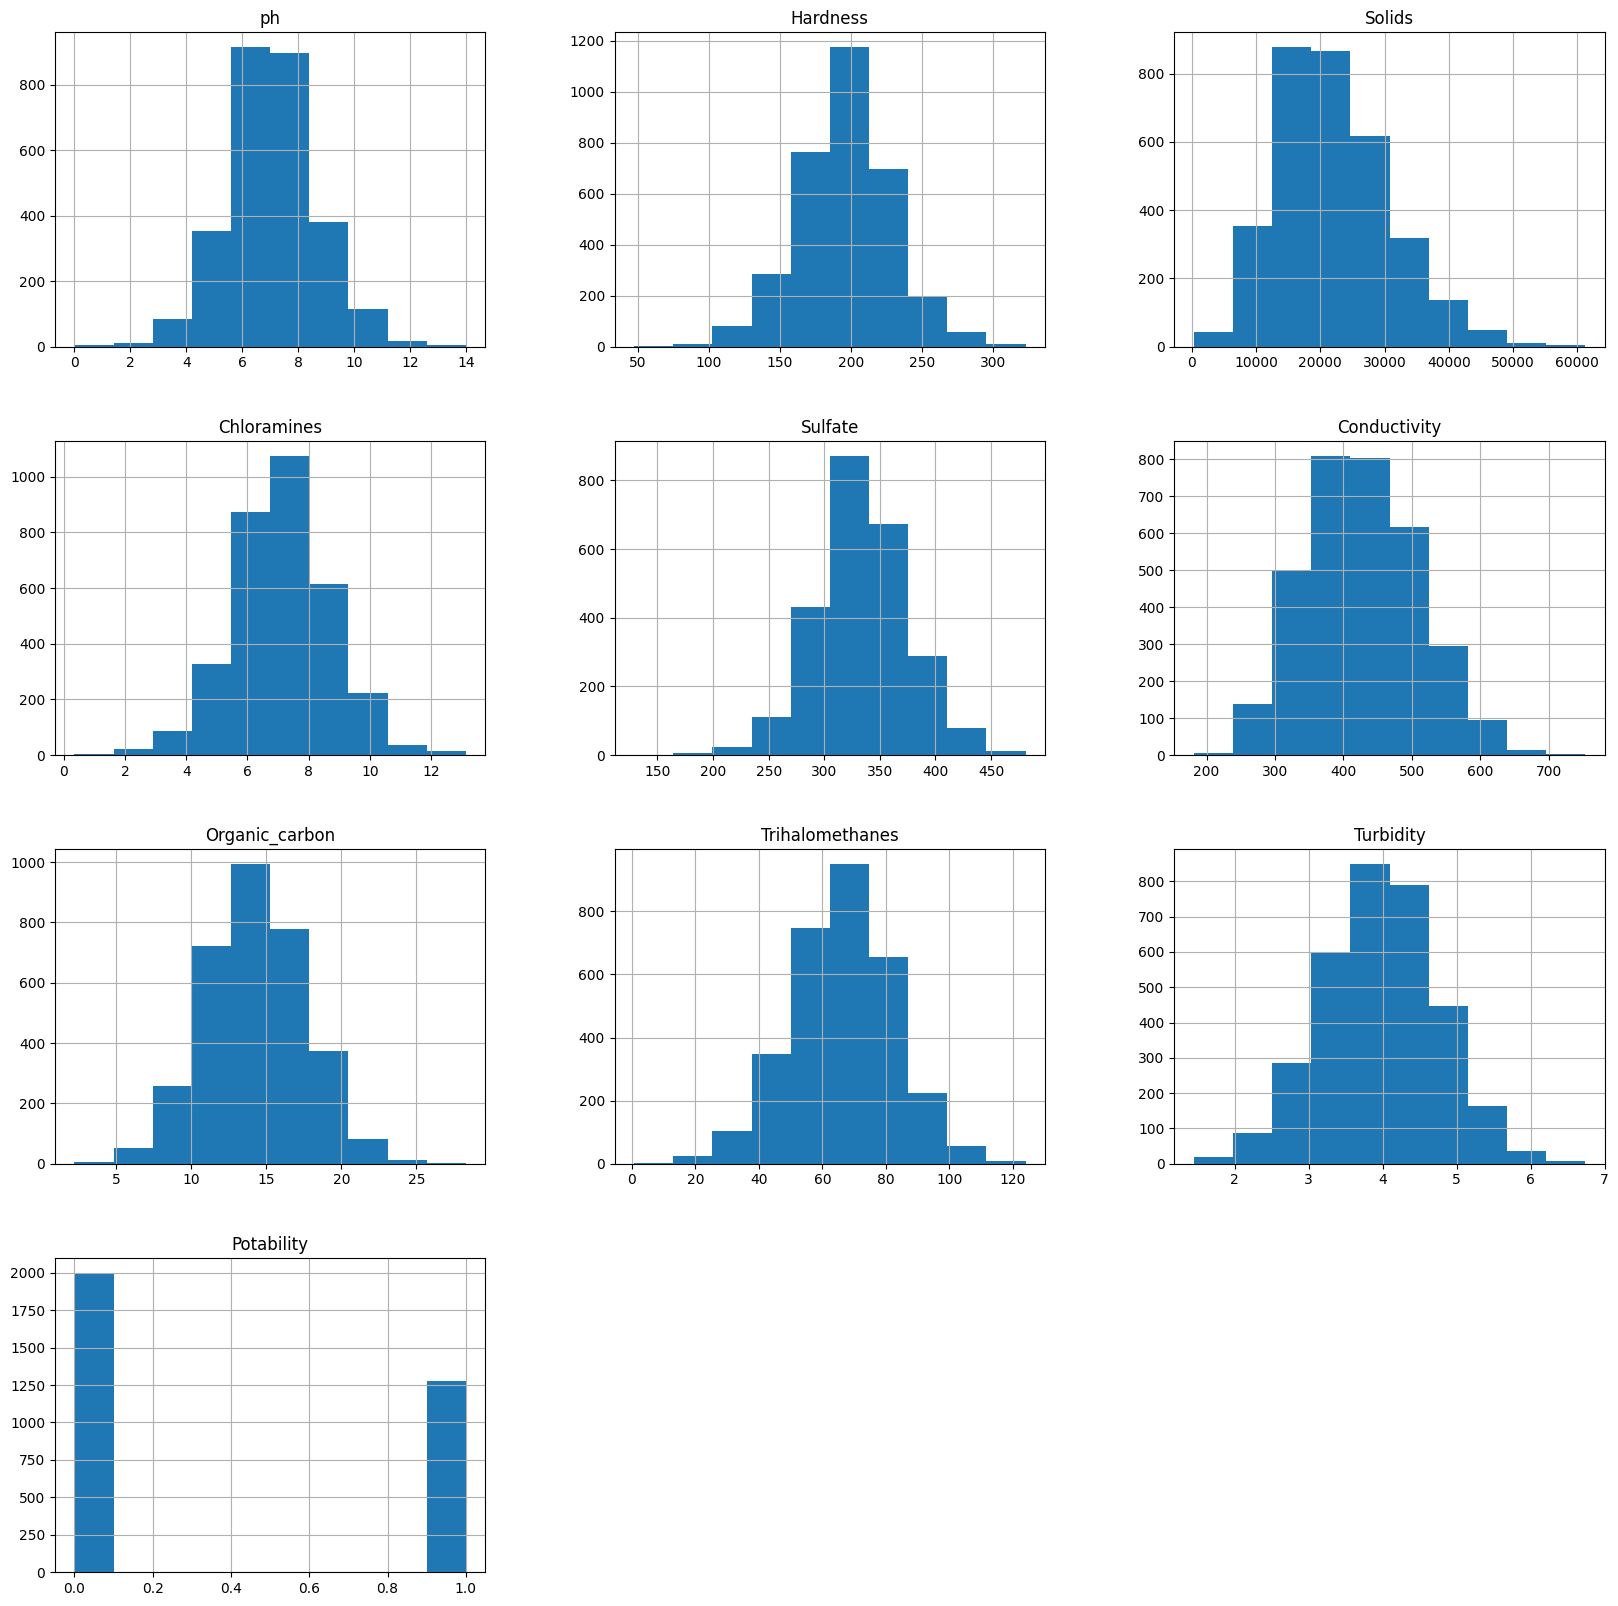

In [22]:
df.hist(figsize=(20, 20))

Barplot για το Potability:

<Axes: xlabel='Potability', ylabel='count'>

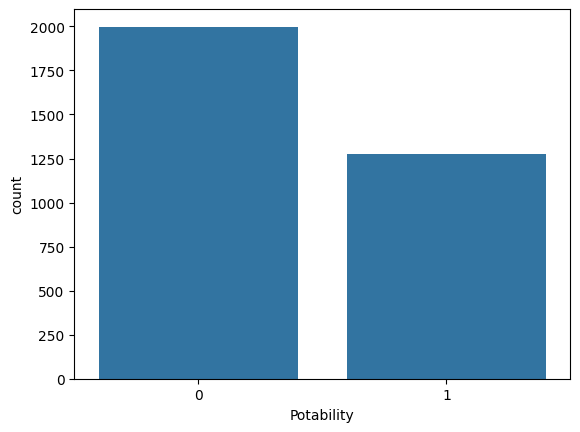

In [23]:
sns.countplot(x='Potability', data=df)

Πλήθος ελλειπών τιμών για κάθε χαρακτηριστικό, εκτός του target που είναι το Potability:

In [24]:
features = df.drop(columns=["Potability"])
print(features.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64


In [25]:
# Potability percentages
potability_counts = df["Potability"].value_counts().sort_index()
percentages = (potability_counts / len(df)) * 100

# Print in table
potability_table = pd.DataFrame({
    "Potability": ["Non Potable", "Potable"],
    "Count": [potability_counts[0], potability_counts[1]],
    "Percentage": [percentages[0].round(2), percentages[1].round(2)]
})

print(potability_table)

    Potability  Count  Percentage
0  Non Potable   1998       60.99
1      Potable   1278       39.01


Παρατηρώντας τα ιστογράμματα των δεδομένων φαίνονται να είναι πολύ καλά από την άποψη ότι όλα μοιάζουν να έχουν κανονικές κατανομές.

Όμως παρατηρούμε ότι στα χαρακτηριστικά ph, Sulfate και Trihalomethanes υπάρχουν αρκετές ελλειπής τιμές. Ειδικά στο ph έχουμε 491/3276 = 15% , και στο Sulfate έχουμε 781/3276 = 23% ελλειπής τιμές, ποσοστά που είναι μεγάλα. Αυτό σημαίνει ότι θα πρέπει να χρησιμοποιήσουμε κάποια μέθοδο αντιμετώπισης/συμπλήρωσης των ελλειπών τιμών.

**Question 2:**

In [26]:
# Different pH groups
low = df[df["ph"] < 6.5]
mid = df[(df["ph"] >= 6.5) & (df["ph"] <= 8.5)]
high = df[df["ph"] > 8.5]
low.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
15,6.347272,186.732881,41065.234765,9.629596,364.487687,516.743282,11.539781,75.071617,4.376348,0
23,3.902476,196.903247,21167.500099,6.996312,NaN,444.478883,16.609033,90.181676,4.528523,0
24,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0


In [27]:
# Function to calculate percentages of 1 and 0 of Potability column
def potability_percentages(data):
    counts = data["Potability"].value_counts()
    percentages = (counts / len(data)) * 100
    return percentages.get(0, 0).round(2), percentages.get(1, 0).round(2)

# Calculate potable/non-potable percentages, for each group
low_non_potable, low_potable = potability_percentages(low)
mid_non_potable, mid_potable = potability_percentages(mid)
high_non_potable, high_potable = potability_percentages(high)

# Result table
results = pd.DataFrame({
    "pH range": ["pH < 6.5", "6.5 ≤ pH ≤ 8.5", "pH > 8.5"],
    "Non-Potable (%)": [low_non_potable, mid_non_potable, high_non_potable],
    "Potable (%)": [low_potable, mid_potable, high_potable]
})

print(results)

         pH range  Non-Potable (%)  Potable (%)
0        pH < 6.5            63.22        36.78
1  6.5 ≤ pH ≤ 8.5            56.10        43.90
2        pH > 8.5            66.87        33.13


Τα αποτελέσματα δεν επιβεβαιώνουν απόλυτα τα προτεινόμενα επίπεδα pH του πόσιμου νερού σύμφωνα με τον ΠΟΥ.

Στα πεδία τιμών για pH<6.5 και pH>8.5 επιβεβαιώνεται ότι το μεγαλύτερο ποσοστό είναι μη-πόσιμο νερό. Όμως για το πεδίο τιμών 6.5 ≤ pH ≤ 8.5 το μεγαλύτερο ποσοστό είναι και πάλι μη-πόσιμο, ενώ θα περιμέναμε η πλειοψηφία να είναι πόσιμο νερό. Παρ'όλα αυτά επειδή το ποσοστό του πόσιμου νερού είναι μεγαλύτερο σε αυτό το πεδίο τιμών (6.5 ≤ pH ≤ 8.5) συγκριτικά με τα άλλα, μπορούμε να πούμε ότι ο ΠΟΥ επαληθεύεται ως ένα βαθμό αλλά όχι απόλυτα.

**Question 3:**

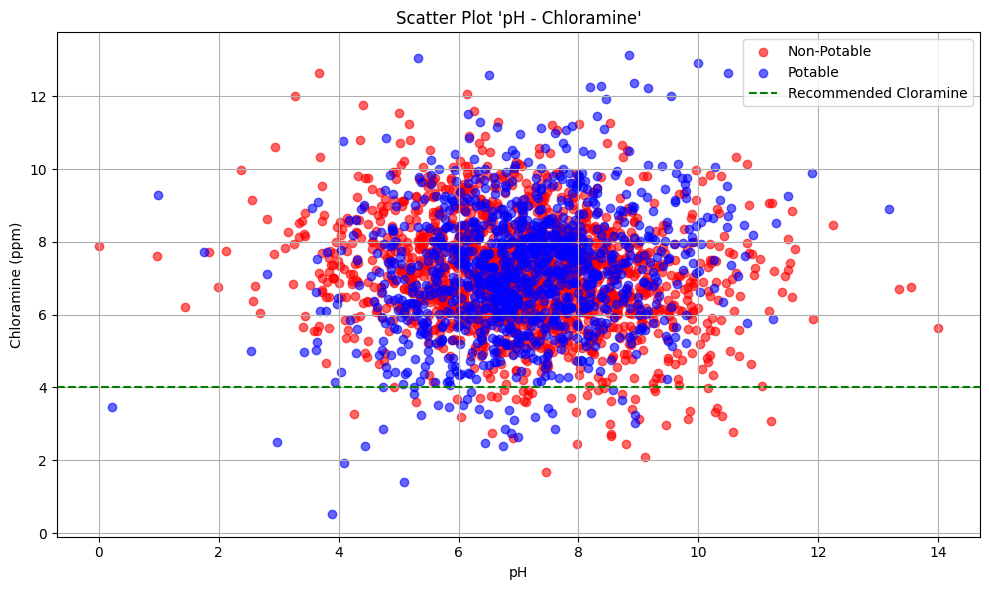

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df["Potability"] == 0]["ph"], df[df["Potability"] == 0]["Chloramines"],
            color="red", label="Non-Potable", alpha=0.6)
plt.scatter(df[df["Potability"] == 1]["ph"], df[df["Potability"] == 1]["Chloramines"],
            color="blue", label="Potable", alpha=0.6)

# Add line for recommended Cloramine levels
plt.axhline(y=4, color="green", linestyle="--", label="Recommended Cloramine")

# Plot details
plt.xlabel("pH")
plt.ylabel("Chloramine (ppm)")
plt.title("Scatter Plot 'pH - Chloramine'")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Βλέπωντας το διάγραμμα διασποράς δεν μπορούμε να διακρίνουμε κάποια ξεκάθαρη διαχωρισιμότητα του πόσιμου και μη-πόσιμου νερού. Το μόνο που μπορούμε να πούμε είναι ότι το πόσιμο νερό είναι ελαφρώς πιο "μαζεμένο" στις τιμές pH 6 εως 8. Για τα επίπεδα χλωραμίνης δεν μπορούμε να βγάλουμε κάποιο χρήσιμο συμπέρασμα. Επίσης το προτεινόμενο επίπεδο χλωραμίνης από τον ΠΟΥ δεν φαίνεται να επιβεβαιώνεται, καθώς τα περισσότερα δείγματα βλέπουμε να το ξεπερνούν.

**Question 4**

In [29]:
# initial values with NULLs
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [31]:
# fill NULLs with the mean value of each characteristic
for col in df.columns:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

# check for NULLs
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


**Question 5:**

In [48]:
# Create numpy arrays for Test set and Train test
X = df.drop(columns=["Potability"]).values
y = df["Potability"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Question 6:**

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [60]:
dt_clf = DecisionTreeClassifier(random_state = 0)
dt_clf.fit(X_train, y_train)

# Predictions at both sets
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

# Accuracy calculations
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Accuracy at Train set: {train_acc:.3f}")
print(f"Accuracy at Test set : {test_acc:.3f}")

Accuracy at Train set: 1.000
Accuracy at Test set : 0.575


Βλέπωντας ότι το accuracy στο train set έχει φτάσει την μονάδα απευθείας βγάζουμε το συμπέρασμα ότι έχει γίνει overfit στα δεδομένα του train set.

Αυτό το επιβεβαιώνουμε και από το accuracy του test set, το οποίο είναι πολύ μικρότερο.

**Question 7:**

In [61]:
X = df.drop(columns=["Potability"]).values
y = df["Potability"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
from itertools import product

# Define parameters
criteria = ["gini", "entropy"]
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features = [None, "sqrt"]
ccp_alpha = [0, 0.01]
results = []

for crit, depth, split, leaf, feat, alpha in product(criteria, max_depths, min_samples_splits, min_samples_leafs, max_features, ccp_alpha):
    dt_clf = DecisionTreeClassifier(
        criterion = crit,
        max_depth = depth,
        min_samples_split = split,
        min_samples_leaf = leaf,
        max_features = feat,
        ccp_alpha = alpha,
        random_state = 0)
    dt_clf.fit(X_train, y_train)

    acc_train = accuracy_score(y_train, dt_clf.predict(X_train))
    acc_test = accuracy_score(y_test, dt_clf.predict(X_test))

    results.append({
        "criterion": crit,
        "max_depth": depth,
        "min_samples_split": split,
        "min_samples_leaf": leaf,
        "max_features": feat,
        "ccp_alpha": alpha,
        "train_acc": round(acc_train, 4),
        "test_acc": round(acc_test, 4)
    })

In [64]:
results_df = pd.DataFrame(results)
print(results_df)

   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0       gini        NaN                  2                 1         None   
1       gini        NaN                  2                 1         None   
2       gini        NaN                  2                 1         sqrt   
3       gini        NaN                  2                 1         sqrt   
4       gini        NaN                  2                 2         None   
..       ...        ...                ...               ...          ...   
91   entropy        5.0                  5                 1         sqrt   
92   entropy        5.0                  5                 2         None   
93   entropy        5.0                  5                 2         None   
94   entropy        5.0                  5                 2         sqrt   
95   entropy        5.0                  5                 2         sqrt   

    ccp_alpha  train_acc  test_acc  
0        0.00     1.0000    0.5748  
1

Συνολικά έχουν δημιουργηθεί 96 δένδρα από όλους τους δυνατούς συνδιασμούς των 6 παραμέτρων.

**Question 8:**

In [73]:
from sklearn.tree import plot_tree

In [66]:
# Train again for max_depth = 3
for crit, split, leaf, feat, alpha in product(criteria, min_samples_splits, min_samples_leafs, max_features, ccp_alpha):
    clf = DecisionTreeClassifier(
        criterion = crit,
        max_depth = 3,
        min_samples_split = split,
        min_samples_leaf=  leaf,
        max_features = feat,
        ccp_alpha = alpha,
        random_state = 0
    )
    clf.fit(X_train, y_train)
    acc_test = accuracy_score(y_test, clf.predict(X_test))
    acc_train = accuracy_score(y_train, clf.predict(X_train))
    results.append({
        "criterion": crit,
        "min_samples_split": split,
        "min_samples_leaf": leaf,
        "max_features": feat,
        "ccp_alpha": alpha,
        "train_acc": acc_train,
        "test_acc": acc_test
    })


results_df = pd.DataFrame(results)
print(results_df)

    criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0        gini        NaN                  2                 1         None   
1        gini        NaN                  2                 1         None   
2        gini        NaN                  2                 1         sqrt   
3        gini        NaN                  2                 1         sqrt   
4        gini        NaN                  2                 2         None   
..        ...        ...                ...               ...          ...   
123   entropy        NaN                  5                 1         sqrt   
124   entropy        NaN                  5                 2         None   
125   entropy        NaN                  5                 2         None   
126   entropy        NaN                  5                 2         sqrt   
127   entropy        NaN                  5                 2         sqrt   

     ccp_alpha  train_acc  test_acc  
0         0.00   1.000000

In [67]:
# Find best accuracy
highest_acc = results_df.loc[results_df["test_acc"].idxmax()]
print(highest_acc)

criterion            entropy
max_depth                5.0
min_samples_split          2
min_samples_leaf           2
max_features            None
ccp_alpha                0.0
train_acc             0.6712
test_acc              0.6551
Name: 84, dtype: object


In [75]:
best_clf = DecisionTreeClassifier(
    criterion = highest_acc["criterion"],
    max_depth = 3,
    min_samples_split = int(highest_acc["min_samples_split"]),
    min_samples_leaf = int(highest_acc["min_samples_leaf"]),
    max_features = highest_acc["max_features"], #None if highest_acc["max_features"] != "sqrt" else "sqrt"
    ccp_alpha = highest_acc["ccp_alpha"],
    random_state = 0
)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=3, min_samples_leaf=2, random_state=0)

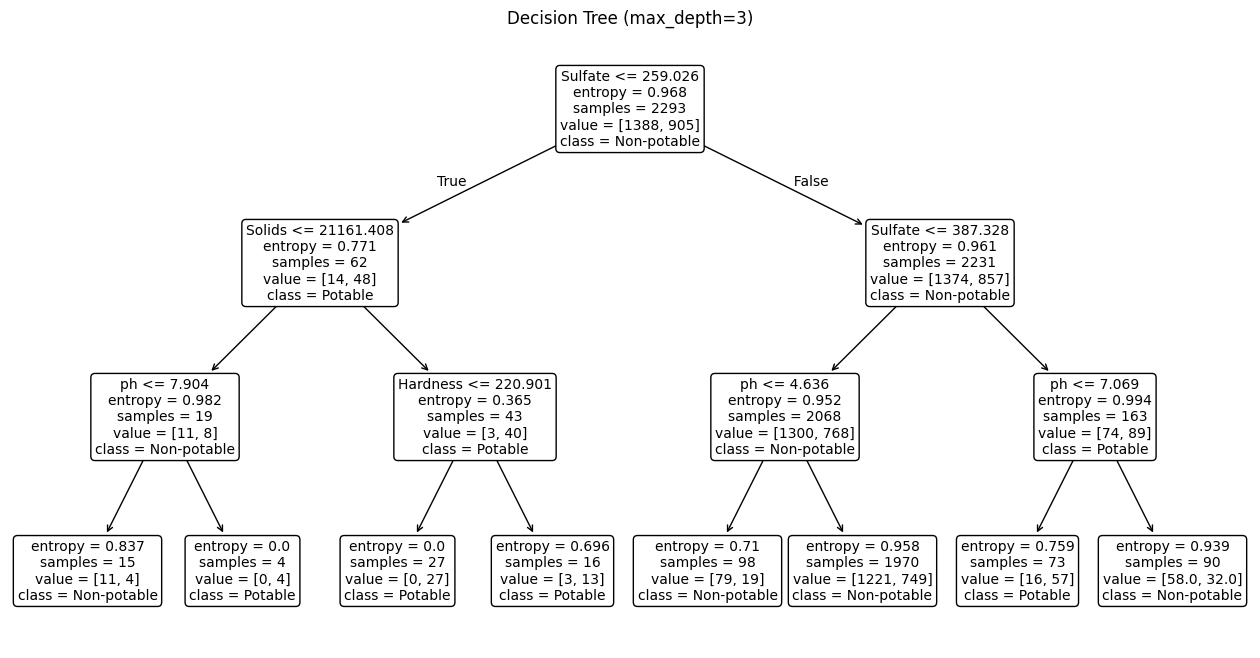

In [79]:
plt.figure(figsize=(16, 8))
plot_tree(
    best_clf,
    feature_names = df.drop(columns=["Potability"]).columns,
    class_names = ["Non-potable", "Potable"],
    rounded = True,
    fontsize = 10
)
plt.title("Decision Tree (max_depth=3)")
plt.show()

Οι κανόνες που εξάγουμε από αυτό το δέντρο έιναι οι εξής:
1. Αν Sulfate<=259.026, Solids <= 21161 και pH <= 7.904 τότε το νερό είναι Μη Πόσιμο.
2. Αν Sulfate<=259.026, Solids <= 21161 και pH > 7.904 τότε το νερό είναι Πόσιμο.
3. Αν Sulfate<=259.026 και Solids > 21161 το νερό είναι Πόσιμο.
5. Αν Sulfate>259.026 και Sulfate<=387.328 το νερό είναι Μη-Πόσιμο
6. Αν Sulfate>259.026, Sulfate>387.328 και pH<=7.069 το νερό είναι Πόσιμο
7.  Αν Sulfate>259.026, Sulfate>387.328 και pH>7.069 το νερό είναι Μη-Πόσιμο

**Question 9:**

Επαναλαμβάνουμε την διαδικασία εκπαίδευσης που κάναμε και στο ερώτημα 7

In [81]:
for crit, depth, split, leaf, feat, alpha in product(criteria, max_depths, min_samples_splits, min_samples_leafs, max_features, ccp_alpha):
    dt_clf = DecisionTreeClassifier(
        criterion = crit,
        max_depth = depth,
        min_samples_split = split,
        min_samples_leaf = leaf,
        max_features = feat,
        ccp_alpha = alpha,
        random_state = 0
    )
    dt_clf.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, dt_clf.predict(X_train))
    acc_test = accuracy_score(y_test, dt_clf.predict(X_test))
    results.append({
        "criterion": crit,
        "max_depth": depth,
        "min_samples_split": split,
        "min_samples_leaf": leaf,
        "max_features": feat,
        "ccp_alpha": alpha,
        "train_acc": acc_train,
        "test_acc": acc_test
    })

results_df = pd.DataFrame(results)

Υπολογίζουμε την παράμετρο με το καλύτερο accuracy, και εκπαιδεύουμε το δένδρο με αύτη την παράμετρο

In [84]:
best_param = results_df.loc[results_df["test_acc"].idxmax()]

best_clf = DecisionTreeClassifier(
    criterion = best_param["criterion"],
    max_depth = int(best_param["max_depth"]),
    min_samples_split = int(best_param["min_samples_split"]),
    min_samples_leaf = int(best_param["min_samples_leaf"]),
    max_features = None if best_param["max_features"] != "sqrt" else "sqrt",
    ccp_alpha = best_param["ccp_alpha"],
    random_state = 0
)

best_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=5, min_samples_leaf=2, random_state=0)


--- Most important features ---
           Feature  Importance
4          Sulfate    0.298956
0               ph    0.244768
3      Chloramines    0.191956
1         Hardness    0.091392
2           Solids    0.086400
7  Trihalomethanes    0.053536
8        Turbidity    0.020127
5     Conductivity    0.012864
6   Organic_carbon    0.000000


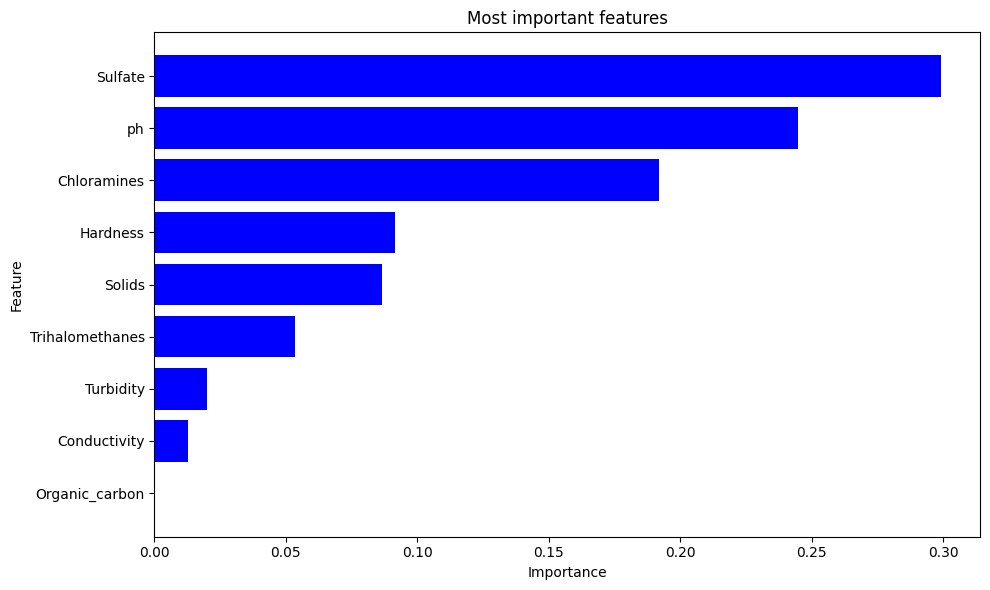

In [88]:
# Calculate most important features
importances = best_clf.feature_importances_
feature_importance = pd.DataFrame({
    "Feature":  df.drop(columns=["Potability"]).columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("\n--- Most important features ---")
print(feature_importance)

# Bar plot of most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="blue")
plt.gca().invert_yaxis()
plt.title("Most important features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Τα 5 πιο σημαντικά χαρακτηριστικά είναι τα "Sulfate", "pH", "Chloramines", "Hardness" και "Solids.

Σύμφωνα με το δένδρο μας αυτά τα χαρακτηριστικά μπορούν να διαχωρίσουν καλύτερα το δεδομένα μας σε Πόσιμο και Μη-Πόσιμο νερό.

**Question 10:**

Από την στιγμή που στον Random Forest χρησιμοποιούμε πολλά δένδρα και όχι μόνο ένα, σημαίνει ότι η τελική απόφαση θα είναι καλύτερη και με μικρότερη πιθανότητα λάθους.

Επίσης με το Random Forest θα αποφύγουμε το overfit στα δεδομένα εκπαίδευσης. Σε αυτό βοηθάει και το γεγονός ότι έχουμε πολλά χαρακτηριστικά (9).

**Question 11:**

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
n_estimators_list = [50, 100, 200]
results = []

In [95]:
for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators = n,
        criterion = "gini",
        max_depth = None,
        random_state = 0
    )

    rf.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, rf.predict(X_train))
    acc_test = accuracy_score(y_test, rf.predict(X_test))

    results.append({"n_estimators": n, "train_acc": acc_train, "test_acc": acc_test})

In [96]:
results_df = pd.DataFrame(results)
print(results_df)

   n_estimators  train_acc  test_acc
0            50        1.0  0.693795
1           100        1.0  0.697864
2           200        1.0  0.689725


In [97]:
results_df = pd.DataFrame(results)
print(results_df)

   n_estimators  train_acc  test_acc
0            50        1.0  0.693795
1           100        1.0  0.697864
2           200        1.0  0.689725


**Question 12:**

Το πιο σημαντικό για το μοντέλο μας είναι να προβλέπει με μεγαλύτερη ακρίβεια το πόσιμο νερό ακόμα και αν αυτό σημαίνει ότι θα χάνει ακρίβεια στην πρόβλεψη του μη πόσιμου νερού.

Αυτό ισχύει γιατί αν κάποιος πιει νερό θεωρώντας το πόσιμο ενώ στην πραγματικότητα είναι μη πόσιμο, τότε κινδυνεύει άμεσα η υγεία του. Αντίθετα αν αποφύγει να πιεί ένα νερό που έχει προβλεφθεί από το μοντέλο εσφαλμένα ως μη πόσιμο, δεν θα επηρεάστεί άμεσα αρνητικά η υγεία του.

**Question 13:**

Όπως αναφέρα και σε προηγούμενη ερώτηση η επιλογή Random Forest οδηγεί σε αποτελέσματα με καλύτερη ακρίβεια (αυτό επιβεβαιώνεται και από τα αποτελέσματα), και με μικρότερο περιθώριο λάθους.

Αν όμως νομικά η εταιρεία είναι υποχρεωμένη να εξηγεί με ξεκάθαρο τρόπο στις αρμόδιες αρχές τον λόγο για τον οποίο έχει γίνει μια πρόβλεψη νερού ως πόσιμου/μη-πόσιμου, τότε το Decision Tree είναι εύκολα και άμεσα επεξηγήσιμο και η εταιρεία έχει στην διάθεσή της τους κανόνες με βάση τους οποίους έγινε η τελική πρόβλεψη.
Αντιθέτως με το μοντέλο Random Forest αυτό είναι πρακτικά αδύνατο και η εταιρεία ενδέχεται να έχει νομικά προβλήματα.

Οπότε η τελικά επιλογή έχει να κάνει με τις νομικές υποχρεώσεις που επιβάλλονται στην εταιρεία από τις εκάστοτε αρμόδιες αρχές.